In [2]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv('data/apartments_condos/total.csv')
df['date_of_sale'] = pd.to_datetime(df['date_of_sale'])
# filtered_df = df[df['tenure'].str]
# df.sort_values(['date_of_sale', 'unit_price_psf', 'price'], ascending=[False, True, True])

### Cleaning up of data
We want to filter the data that has lease commencing before 2000. We will also be keeping data that is considered to be freehold

In [4]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

filter_year = 2000
df = df[~df['tenure'].isnull()]
freehold_df = df[df['tenure'].str.contains('hold')]
filtered_df = df[~df['tenure'].str.contains('hold')]
filtered_df['tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))

filtered_df = filtered_df[(filtered_df['tenure'] > filter_year)]
combined_df = pd.concat([filtered_df, freehold_df])
combined_df

<ipython-input-4-82a8015097f4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))


,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
0,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,1744529,-,764,Strata,21 to 25,2283,2020-03-31
1,THE SAIL @ MARINA BAY,MARINA BOULEVARD,Apartment,1,CCR,2002,Resale,1,1200000,-,667,Strata,56 to 60,1798,2020-02-29
2,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,2546716,-,1173,Strata,11 to 15,2171,2020-02-29
3,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,2005,Resale,1,1080000,-,581,Strata,31 to 35,1858,2020-02-29
4,MARINA ONE RESIDENCES,MARINA WAY,Apartment,1,CCR,2011,Resale,1,2700364,-,1141,Strata,21 to 25,2367,2020-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56304,MIMOSA PARK,MIMOSA ROAD,Condominium,28,OCR,Freehold,Resale,1,1760000,-,2153,Strata,06 to 10,818,2017-05-31
56309,SERENITY PARK,TAMARIND ROAD,Condominium,28,OCR,Freehold,Resale,1,1150000,-,1313,Strata,01 to 05,876,2017-05-31
56310,MIMOSA PARK,MIMOSA ROAD,Condominium,28,OCR,Freehold,Resale,1,1560000,-,1894,Strata,06 to 10,823,2017-04-30
56313,SERENITY PARK,TAMARIND ROAD,Condominium,28,OCR,Freehold,Resale,1,1260000,-,1593,Strata,01 to 05,791,2017-04-30


### Grouping data by postal district

In [5]:
mean_df = combined_df.groupby(['postal_district', 'date_of_sale'])['unit_price_psf'].mean().unstack(level=0)
# mean_df.xs(1, level='postal_district').reset_index()
# mean_df.plot(x='date_of_sale', y='unit_price_psf')
# mean_df


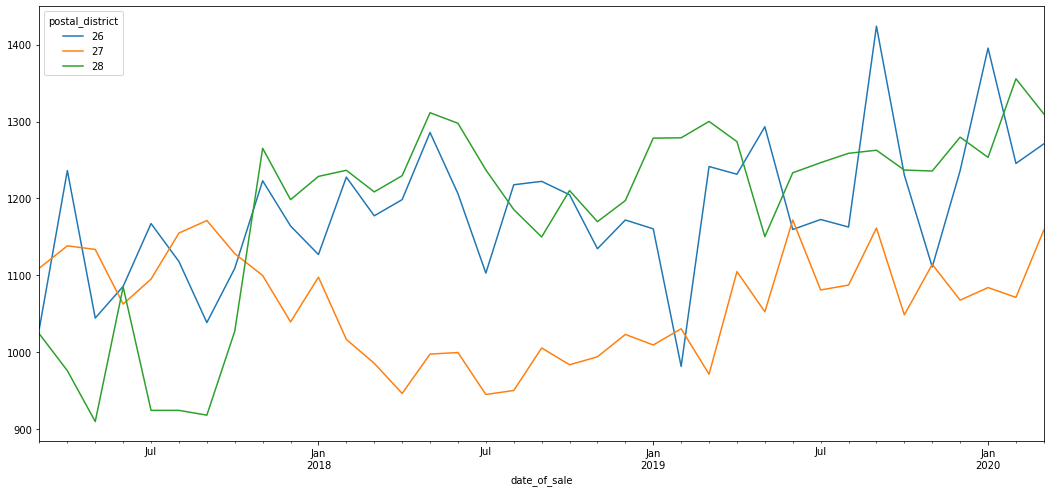

In [25]:
mean_df.plot(figsize=(18,8), y=[26,27,28])

In [18]:
combined_df[(combined_df['project_name'].str.contains('WOODLEIGH')) & (combined_df['type_of_sale'] == 'New Sale')].sort_values('unit_price_psf')

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
22934,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,988000,-,570,Strata,01 to 05,1732,2019-05-31
22839,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,988000,-,570,Strata,01 to 05,1732,2019-06-30
22816,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1156000,-,667,Strata,01 to 05,1732,2019-06-30
24540,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1026000,-,592,Strata,01 to 05,1733,2020-03-31
22676,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1026000,-,592,Strata,01 to 05,1733,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1414000,-,646,Strata,06 to 10,2189,2018-11-30
23418,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1497000,-,646,Strata,06 to 10,2318,2018-11-30
22840,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,2500000,-,1076,Strata,11 to 15,2323,2019-06-30
22958,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,3428100,-,1475,Strata,11 to 15,2325,2019-05-31


In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
combined_df[combined_df['postal_district'] == 26].sort_values(['project_name', 'unit_price_psf'])

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
53864,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1107000,-,1259,Strata,01 to 05,879,2017-03-31
53842,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1100000,-,1238,Strata,06 to 10,889,2017-05-31
53795,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1700000,-,1873,Strata,11 to 15,908,2017-09-30
53790,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1160000,-,1238,Strata,01 to 05,937,2017-10-31
53781,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1168888,-,1238,Strata,01 to 05,944,2017-10-31
53862,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1190000,-,1259,Strata,06 to 10,945,2017-03-31
53824,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1175000,-,1238,Strata,06 to 10,949,2017-07-31
53857,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1600000,-,1658,Strata,11 to 15,965,2017-04-30
53814,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,800000,-,807,Strata,01 to 05,991,2017-07-31
53832,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,805000,-,807,Strata,06 to 10,997,2017-06-30
